# Traffic Sign Detection Project

In [1]:
#write name team with tabulate
from tabulate import tabulate

member_name = [

    ["BUN RATNATEPY", "Female", "I4-AMS-A", "e20210320"],
    ["CHAN SOPHARA", "Male", "I4-AMS-A", "e20211081"],
    ["CHHRAN MOSES", "Male", "I4-AMS-A", "e20210294"],
]
member_info = ["Name", "Gender", "Program", "ID"]
print("Group 8- I4 -Artificial intelligence -TP-A:")
print(tabulate(member_name, headers=member_info, tablefmt="fancy_grid"))

Group 8- I4 -Artificial intelligence -TP-A:
╒═══════════════╤══════════╤═══════════╤═══════════╕
│ Name          │ Gender   │ Program   │ ID        │
╞═══════════════╪══════════╪═══════════╪═══════════╡
│ BUN RATNATEPY │ Female   │ I4-AMS-A  │ e20210320 │
├───────────────┼──────────┼───────────┼───────────┤
│ CHAN SOPHARA  │ Male     │ I4-AMS-A  │ e20211081 │
├───────────────┼──────────┼───────────┼───────────┤
│ CHHRAN MOSES  │ Male     │ I4-AMS-A  │ e20210294 │
╘═══════════════╧══════════╧═══════════╧═══════════╛


## Section 1: Importing Libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Section 2: Dataset Preparation

In [6]:
# Paths to the dataset
TRAIN_DIR = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Dataset\DATA"
TEST_DIR = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Dataset\TEST"
LABELS_PATH = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\labels.csv"

# Load labels
labels_df = pd.read_csv(LABELS_PATH)
class_names = labels_df.set_index('ClassId')['Name'].to_dict()

def load_train_data(train_dir):
    images, labels = [], []
    class_folders = os.listdir(train_dir)
    for class_id in class_folders:
        class_path = os.path.join(train_dir, class_id)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (48, 48))  # Resize to 32x32
            images.append(img)
            labels.append(int(class_id))
    return np.array(images), np.array(labels)

def load_test_data(test_dir):
    images = []
    for img_name in os.listdir(test_dir):
        img_path = os.path.join(test_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (48, 48))  # Resize to 32x32
        images.append(img)
    return np.array(images)

In [7]:
# Load datasets
X_train, y_train = load_train_data(TRAIN_DIR)
X_test = load_test_data(TEST_DIR)


In [8]:
# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# One-hot encode labels
y_train = to_categorical(y_train)

## Section 3: Model Creation

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(labels_df), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\sopha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Section 4: Model Training

In [11]:
BATCH_SIZE = 32
EPOCHS = 10

# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)
data_gen.fit(X_train)

history = model.fit(
    data_gen.flow(X_train, y_train, batch_size=BATCH_SIZE),
    epochs=EPOCHS
)

Epoch 1/10


c:\Users\sopha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2298 - loss: 3.1599
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.5296 - loss: 1.6241
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6890 - loss: 1.0239
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.7808 - loss: 0.7223
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8355 - loss: 0.5540
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8619 - loss: 0.4389
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8822 - loss: 0.3697
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9045 - loss: 0.3037
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9129 - loss: 0.2571
Epoch 10/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.9282 - loss: 0.2352


## Section 5: Model Evaluation

In [12]:
# Note: Since the test data does not have labels, accuracy cannot be directly evaluated on the test set.
# We will use the training set's split for validation during training instead.

loss, accuracy = model.evaluate(X_train, y_train)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9881 - loss: 0.0418
Training Accuracy: 97.89%


## Section 6: Traffic Sign Detection

In [13]:
# Load the saved model (if already trained)
model.save('traffic_sign_model.h5')
model = load_model('traffic_sign_model.h5')

def predict_sign(image_path):
    """Predict the traffic sign from an input image."""
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (48, 48)) / 255.0
    img_expanded = np.expand_dims(img_resized, axis=0)
    predictions = model.predict(img_expanded)
    class_id = np.argmax(predictions)
    confidence = np.max(predictions)
    return class_names[class_id], confidence

In [14]:
# Example usage for single image input
image_path = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Dataset\TEST\011_0019_j.png"
sign_name, conf = predict_sign(image_path)
print(f"Predicted Sign: {sign_name}, Confidence: {conf:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted Sign: Dont Go Left, Confidence: 1.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


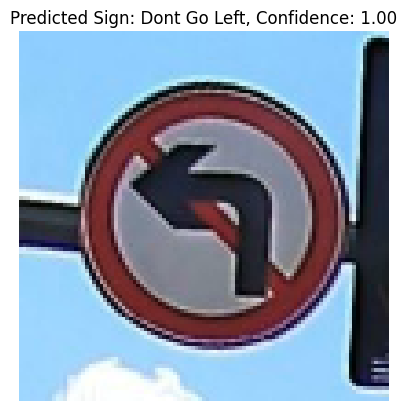

Predicted Sign: Dont Go Left, Confidence: 1.00


In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def predict_sign(image_path):
    """Predict the traffic sign from an input image."""
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (48, 48)) / 255.0
    img_expanded = np.expand_dims(img_resized, axis=0)
    predictions = model.predict(img_expanded)
    class_id = np.argmax(predictions)
    confidence = np.max(predictions)
    return class_names[class_id], confidence, img  # Return the image for display

# Example usage for single image input
image_path = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Dataset\TEST\011_0019_j.png"
sign_name, conf, img = predict_sign(image_path)

# Display the image and the prediction result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')  # Hide axes
plt.title(f"Predicted Sign: {sign_name}, Confidence: {conf:.2f}")
plt.show()

print(f"Predicted Sign: {sign_name}, Confidence: {conf:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


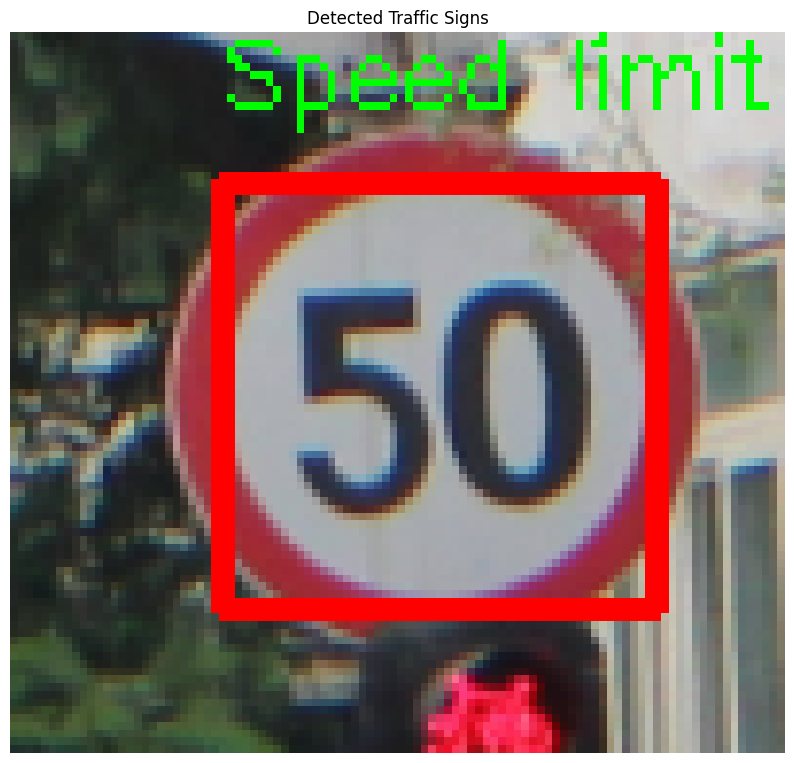

In [17]:
def detect_traffic_signs(image_path):
    """Detect and classify traffic signs in an image."""
    # Load and preprocess the image
    image = cv2.imread(image_path)
    original_image = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect edges and contours (basic traffic sign detection logic)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    best_confidence = 0
    best_box = None
    best_label = None

    for contour in contours:
        # Approximate the contour to filter out small or irregular shapes
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        x, y, w, h = cv2.boundingRect(approx)

        if w > 20 and h > 20:  # Filter small boxes
            # Extract and preprocess the region of interest (ROI)
            roi = image[y:y+h, x:x+w]
            roi_resized = cv2.resize(roi, (48, 48)) / 255.0
            roi_expanded = np.expand_dims(roi_resized, axis=0)

            # Predict the class of the ROI
            predictions = model.predict(roi_expanded)
            class_id = np.argmax(predictions)
            confidence = np.max(predictions)

            # Keep track of the best detection
            if confidence > best_confidence:
                best_confidence = confidence
                best_box = (x, y, w, h)
                best_label = f"{class_names[class_id]} ({confidence:.2f})"

    # Draw the best bounding box and label if found
    if best_box and best_confidence > 0.5:
        x, y, w, h = best_box
        cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box
        cv2.putText(original_image, best_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

    # Show the result inline (e.g., in Jupyter Notebook)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Detected Traffic Signs')
    plt.show()

# Example usage for detecting traffic signs in an image
image_path = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Dataset\DATA\4\004_1_0008.png"
detect_traffic_signs(image_path)


## Section 7: Traffic Sign Detection in Video

# Video resize 

In [18]:
import cv2

def resize_video(input_path, output_path, width, height):
    """
    Resize a video to the specified width and height.

    Args:
        input_path (str): Path to the input video.
        output_path (str): Path to save the resized video.
        width (int): Desired width of the output video.
        height (int): Desired height of the output video.
    """
    # Open the input video
    cap = cv2.VideoCapture(input_path)
    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    fps = cap.get(cv2.CAP_PROP_FPS)
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Resize the frame
        resized_frame = cv2.resize(frame, (width, height))
        
        # Write the resized frame to the output video
        out.write(resized_frame)
    
    # Release resources
    cap.release()
    out.release()

# Example usage
input_path = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Traffic sign video.mp4"
output_path = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Traffic sign video_resize.mp4"
desired_width = 600  # New width
desired_height = 480  # New height

resize_video(input_path, output_path, desired_width, desired_height)

# Video demonstration 

In [3]:
def process_video_with_bounding_boxes(video_path, output_path):
    """Detect traffic signs with up to 2 best bounding boxes in a video and save output."""
    cap = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        original_frame = frame.copy()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect edges and contours
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        edges = cv2.Canny(blurred, 50, 150)
        contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        top_boxes = []  # To store up to 2 best bounding boxes

        for contour in contours:
            # Approximate contour and get bounding box
            approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
            x, y, w, h = cv2.boundingRect(approx)

            if w > 20 and h > 20:  # Filter out small regions
                # Extract and preprocess ROI
                roi = frame[y:y+h, x:x+w]
                roi_resized = cv2.resize(roi, (48, 48)) / 255.0
                roi_expanded = np.expand_dims(roi_resized, axis=0)

                # Predict the class of the ROI
                predictions = model.predict(roi_expanded)
                class_id = np.argmax(predictions)
                confidence = np.max(predictions)

                if confidence > 0.5:  # Confidence threshold
                    top_boxes.append((confidence, x, y, w, h, class_id))

        # Sort bounding boxes by confidence and keep the top 2
        top_boxes = sorted(top_boxes, key=lambda b: b[0], reverse=True)[:2]

        for box in top_boxes:
            confidence, x, y, w, h, class_id = box
            label = f"{class_names[class_id]} ({confidence:.2f})"
            # Draw bounding box and label
            cv2.rectangle(original_frame, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box
            cv2.putText(original_frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

        out.write(original_frame)
        cv2.imshow('Traffic Sign Detection', original_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Example usage
video_path = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Traffic sign video_resize.mp4"
output_path = r"C:\ITC Year 4\I4 Artificial Intelligent (TP)\Final Project AI ( TP )\Traffic sign video_test.mp4"
process_video_with_bounding_boxes(video_path, output_path)


NameError: name 'model' is not defined